### 1. IMPORTS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, IntProgress, Box, Label, Layout
from IPython.display import display
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import os
import warnings
warnings.filterwarnings("ignore")

### 2. DATA LOADING AND PREPARATION

In [9]:
os.listdir()

['2020-datos-anuales-panel-consumo-alimentario-hogares-rev-nov2021_tcm30-561748.xlsx',
 'ESP_adm',
 'spain_cafe_point_IGISMAP.csv',
 'Stats_Maps.ipynb']

In [6]:
sheetname = ["VALOR","VOLUMEN","PENETRACIÓN","SOCIOECONÓMICO VALOR","SOCIOECONÓMICO VOLUMEN","SOCIOECONÓMICO PENETRACIÓN"]
sheetname_mes = ["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre"]

In [7]:
sheetname_unit = sheetname.copy()
sheetname_unit[0] = sheetname[0] + " [M€]"
sheetname_unit[1] = sheetname[1] + " [k Kg]"
sheetname_unit[2] = sheetname[2] + " [%]"
sheetname_unit[3] = sheetname[3] + " [M€]"
sheetname_unit[4] = sheetname[4] + " [k Kg]"
sheetname_unit[5] = sheetname[5] + " [%]"

In [10]:
anual20 = pd.read_excel(os.listdir()[0], sheet_name = sheetname, index_col = [0], header = [2])

In [34]:
print(f"""
It has been loaded a dataset of food consumption in Spain.
It has the following features:
{list(anual20.keys())}
""")


It has been loaded a dataset of food consumption in Spain.
It has the following features:
['VALOR', 'VOLUMEN', 'PENETRACIÓN', 'SOCIOECONÓMICO VALOR', 'SOCIOECONÓMICO VOLUMEN', 'SOCIOECONÓMICO PENETRACIÓN']



In [42]:
print(f"""
Every feature has the food classification as below:

{list(anual20[sheetname[0]].index)[:50]} etc... 
""")


Every feature has the food classification as below:

['.TOTAL ALIMENTACION', 'T.HUEVOS KGS', 'T.HUEVOS UNDS.', 'TOTAL HUEVOS GALLINA', 'OTRAS AVES', 'MIEL', 'GRANEL', 'ENVASADA', 'TOTAL CARNE', 'CARNE CERTIFICADA', 'CARNE FRESCA', 'SALCHICHAS FRESCAS', 'CARNE VACUNO', 'TERNERA', 'AÑOJO', 'MAYOR', 'CARNE POLLO', 'POLLO ENTERO', 'POLLO FILETES', 'POLLO POR PIEZAS', 'CARNE CONEJO', 'CARNE OVINO/CAPRINO', 'CORDERO', 'CABRITO', 'OTRO OVINO/CAPRINO', 'OVINO/CAPRINO ENTE', 'OVINO/CAPRINO PIEZ', 'CARNE CERDO', 'CARNE CERDO ADOBAD', 'CARN.CERDO IBERICO', 'CARNE CABALLO', 'CARNE DESPOJOS', 'DESPOJOS CERDO', 'DESPOJOS CORDERO', 'DESPOJOS POLLO', 'DESPOJOS TERNERA', 'DESPOJOS OT.PROCED', 'OTRAS CARNES FRESCA', 'AVESTRUZ', 'PAVO', 'OTRAS AVES', 'CARNE CONGELADA', 'C.CONG.POLLO', 'C.CONG.CERDO', 'C.CONG.VACA', 'CARNE CABALLO', 'RESTO CARNES CONG.', 'SALCHICHAS CONGELAD', 'CARNE TRANSFORMADA', 'JAMON CURADO+PALETA'] etc... 



#### In this example we will focus in Capsule Coffee:

In [44]:
anual20[sheetname[0]][anual20[sheetname[0]].index.str.contains("CAFE EN CAPSULAS")]

,T.ESPAÑA,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
CAFE EN CAPSULAS,649859.16,177961.35,21537.718,19916.618,85573.921,23536.076,105057.411,72980.234,17656.5368,8127.2802,19595.553,29486.065,12840.6885,4012.6204,25553.24,3134.1822,6327.3876,16562.302


In [45]:
i=3
data = anual20[sheetname[i]][anual20[sheetname[i]].index.str.contains("CAFE EN CAPSULAS")].T.sort_values("CAFE EN CAPSULAS",ascending=False)
data.describe()

,CAFE EN CAPSULAS
count,41.00000
mean,142652.01339
std,125439.33839
min,16562.30200
25%,54517.22500
50%,109156.70900
75%,175223.33000
max,649859.16000


### 3. MAPS PLOTS

In [59]:
def anual20_plot1(i):
    df_bars = anual20[sheetname[i]][anual20[sheetname[i]].index.str.contains("CAFE EN CAPSULAS")].T.sort_values("CAFE EN CAPSULAS",ascending=False).T
    df_map = anual20[sheetname[i]][anual20[sheetname[i]].index.str.contains("CAFE EN CAPSULAS")].iloc[:,1:].T.reset_index().rename(columns = {"index":"area"})

    ######################## BARS ########################
    
    fig, ax = plt.subplots(1,2,figsize = (23,7))
    plt.suptitle(f"{df_bars.index[0]} | {sheetname_unit[i]}", fontsize = 22)
    
    ax[0].bar(x = df_bars.columns[1:], height = df_bars.values[0][1:])
    
    ax[0].set_xticklabels(df_bars.columns[1:], rotation = 90, fontsize = 10)
    ax[0].set_xlabel("Region", fontsize = 14)
    ax[0].set_ylabel(sheetname_unit[i].capitalize(), fontsize = 14)
    
    ######################## MAP ########################
    # FROM: https://boundingbox.klokantech.com/
    # format: DublinCore
    # westlimit=-11.47; southlimit=35.19; eastlimit=4.88; northlimit=44.44
    
    coord = {"westlimit":-11.47, "southlimit":35.19, "eastlimit":4.88, "northlimit":44.44}
    # Center of the map
    lat_0 = (coord["northlimit"]-coord["southlimit"])/2 + coord["southlimit"]
    lon_0 = (coord["westlimit"]-coord["eastlimit"])/2 + coord["eastlimit"]
    
    m = Basemap(resolution='i', # c, l, i, h, f or None
                projection='merc',
                lat_0 = lat_0, lon_0 = lon_0,
                llcrnrlon = coord["westlimit"], llcrnrlat = coord["southlimit"], urcrnrlon = coord["eastlimit"], urcrnrlat = coord["northlimit"])
    
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.drawcoastlines()
    m.drawcountries()
    
    m.readshapefile("ESP_adm/ESP_adm1","ESP_adm1")
    
    df_poly = pd.DataFrame({
            'shapes': [Polygon(np.array(shape), True) for shape in m.ESP_adm1],
            'area': [area['NAME_1'] for area in m.ESP_adm1_info]
        })
    
    # UNIFY AREA NAMES BETWEEM MAP AND DATA
    # anual20[sheetname[0]][anual20[sheetname[0]].index.str.contains("CAFE EN CAPSULAS")].iloc[:,1:].T.sort_index().index
    reg_adm_esp = {'Andalucía':'ANDALUCÍA', 'Aragón':'ARAGÓN', 'Cantabria':'CANTABRIA', 'Castilla-La Mancha':'CASTILLA - LA MANCHA','Castilla y León':'CASTILLA Y LEÓN','Cataluña':'CATALUÑA','Comunidad de Madrid':'COMUNIDAD DE MADRID', 'Comunidad Foral de Navarra':'C. FORAL DE NAVARRA','Comunidad Valenciana':'COMUNITAT VALENCIANA', 'Extremadura':'EXTREMADURA', 'Galicia':'GALICIA', 'Islas Baleares':'ILLES BALEARS','Islas Canarias':'CANARIAS', 'La Rioja':'LA RIOJA', 'País Vasco':'PAIS VASCO','Principado de Asturias':'PRINCIPADO DE ASTURIAS', 'Región de Murcia':'REGIÓN DE MURCIA'}
    # ,'Ceuta y Melilla':
    df_poly["area"].replace(reg_adm_esp,inplace = True)
    
    df_poly = df_poly.merge(df_map, on='area', how='left')
    
    cmap = plt.get_cmap('Oranges')   
    pc = PatchCollection(df_poly.shapes, zorder=2)
    norm = Normalize()

    pc.set_facecolor(cmap(norm(df_poly["CAFE EN CAPSULAS"].fillna(0).values)))
    ax[1].add_collection(pc)    
    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    mapper.set_array(df_poly["CAFE EN CAPSULAS"])
    plt.colorbar(mapper, shrink=0.8)

    plt.subplots_adjust(left=0.12,
                    bottom=0.1, 
                    right=0.88, 
                    top=0.92, 
                    wspace=0.05, 
                    hspace=0.1)
    plt.show()

#### 3.1 Cataluña and Andalucia (the east of the country in general) are the states with more consumption and economic value generated.

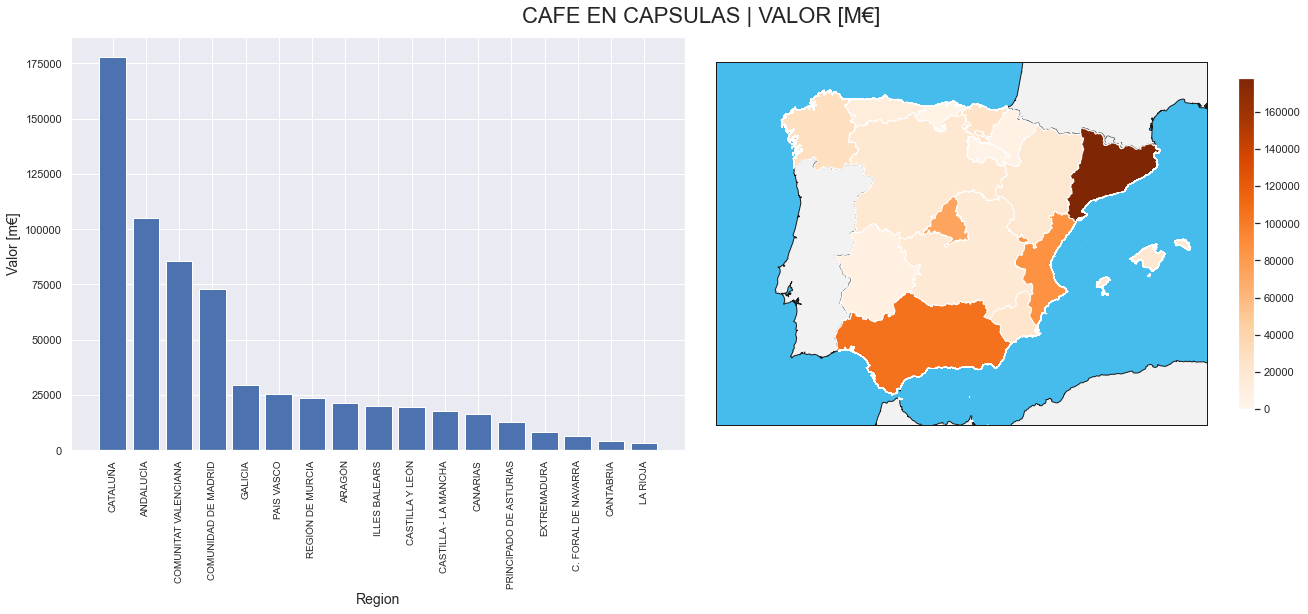

In [60]:
anual20_plot1(0)

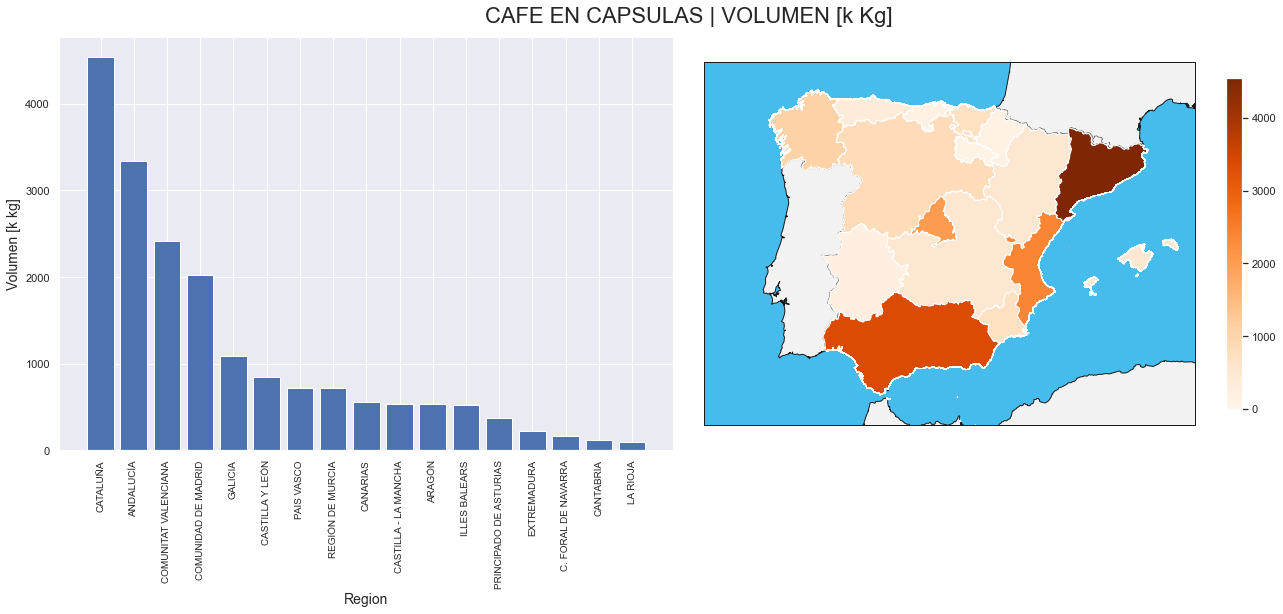

In [48]:
anual20_plot1(1)

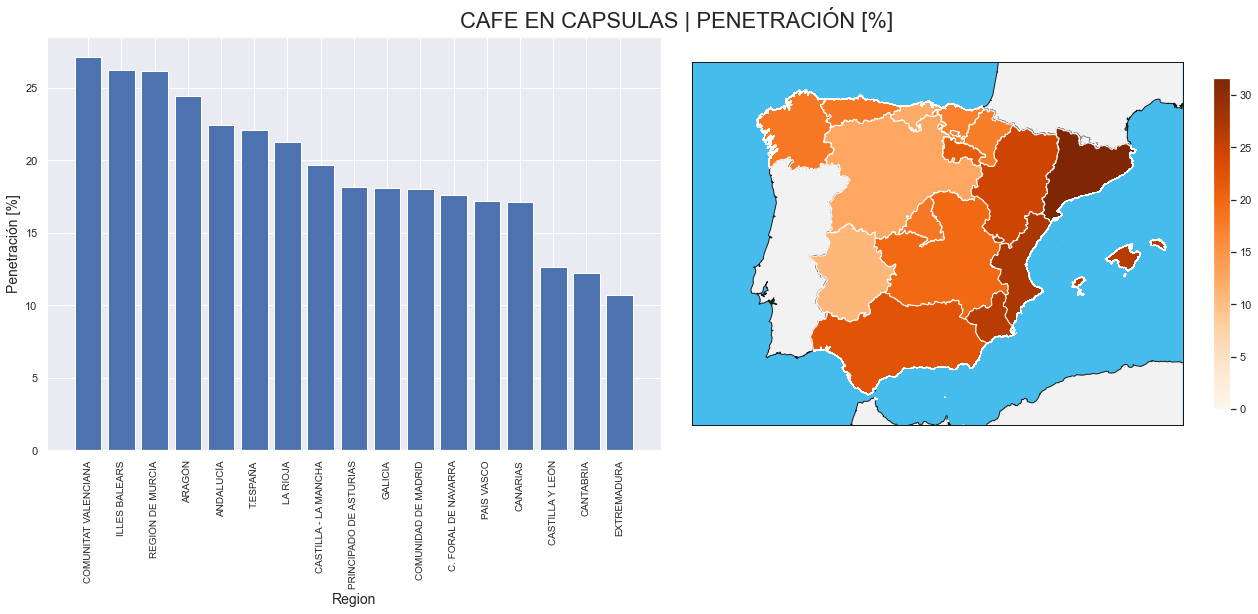

In [50]:
anual20_plot1(2)

In [72]:
def anual20_plot2(i):
    df_map = anual20[sheetname[i]][anual20[sheetname[i]].index.str.contains("CAFE EN CAPSULAS")].iloc[:,1:].T.reset_index().rename(columns = {"index":"area"})
    fig, ax = plt.subplots(figsize = (23,7))
    ax.set_title(f"Spain Capsule Coffee Consumption [k Kg]", fontsize = 22, pad = 20)
    ######################## MAP ########################
    # FROM: https://boundingbox.klokantech.com/
    # format: DublinCore
    # westlimit=-11.47; southlimit=35.19; eastlimit=4.88; northlimit=44.44
    
    coord = {"westlimit":-11.47, "southlimit":35.19, "eastlimit":4.88, "northlimit":44.44}
    # Center of the map
    lat_0 = (coord["northlimit"]-coord["southlimit"])/2 + coord["southlimit"]
    lon_0 = (coord["westlimit"]-coord["eastlimit"])/2 + coord["eastlimit"]
    
    m = Basemap(resolution='i', # c, l, i, h, f or None
                projection='merc',
                lat_0 = lat_0, lon_0 = lon_0,
                llcrnrlon = coord["westlimit"], llcrnrlat = coord["southlimit"], 
                urcrnrlon = coord["eastlimit"], urcrnrlat = coord["northlimit"])
    
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.drawcoastlines()
    m.drawcountries()
    
    m.readshapefile("ESP_adm/ESP_adm1","ESP_adm1")
    
    df_poly = pd.DataFrame({
            'shapes': [Polygon(np.array(shape), True) for shape in m.ESP_adm1],
            'area': [area['NAME_1'] for area in m.ESP_adm1_info]
        })
    
    # UNIFY AREA NAMES BETWEEM MAP AND DATA
    # anual20[sheetname[0]][anual20[sheetname[0]].index.str.contains("CAFE EN CAPSULAS")].iloc[:,1:].T.sort_index().index
    reg_adm_esp = {'Andalucía':'ANDALUCÍA', 'Aragón':'ARAGÓN', 'Cantabria':'CANTABRIA', 'Castilla-La Mancha':'CASTILLA - LA MANCHA','Castilla y León':'CASTILLA Y LEÓN','Cataluña':'CATALUÑA','Comunidad de Madrid':'COMUNIDAD DE MADRID', 'Comunidad Foral de Navarra':'C. FORAL DE NAVARRA','Comunidad Valenciana':'COMUNITAT VALENCIANA', 'Extremadura':'EXTREMADURA', 'Galicia':'GALICIA', 'Islas Baleares':'ILLES BALEARS','Islas Canarias':'CANARIAS', 'La Rioja':'LA RIOJA', 'País Vasco':'PAIS VASCO','Principado de Asturias':'PRINCIPADO DE ASTURIAS', 'Región de Murcia':'REGIÓN DE MURCIA'}
    # ,'Ceuta y Melilla':
    df_poly["area"].replace(reg_adm_esp,inplace = True)
    
    df_poly = df_poly.merge(df_map, on='area', how='left')
    
    cmap = plt.get_cmap('Oranges')   
    pc = PatchCollection(df_poly.shapes, zorder=2)
    norm = Normalize()

    pc.set_facecolor(cmap(norm(df_poly["CAFE EN CAPSULAS"].fillna(0).values)))
    ax.add_collection(pc)    
    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    mapper.set_array(df_poly["CAFE EN CAPSULAS"])
    plt.colorbar(mapper, shrink=0.8)

    plt.subplots_adjust(left=0.12,
                    bottom=0.1, 
                    right=0.88, 
                    top=0.92, 
                    wspace=0.05, 
                    hspace=0.1)
    plt.show()

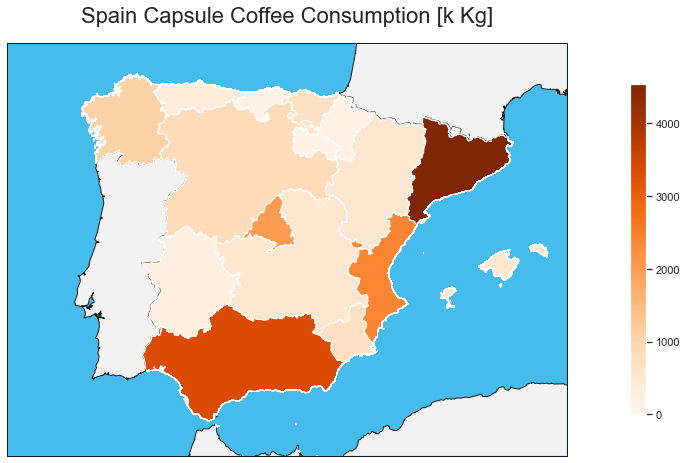

In [73]:
anual20_plot2(1)